In [2]:
import pandas as pd

# Ruta del archivo CSV
ruta = r"C:\Users\46210843\OneDrive - Universidad Nacional Abierta y a Distancia\6TO SEMESTRE\ANÁLISIS DE DATOS\trabajo 3\Red Wine Quality\winequality-red.csv"

# Cargar el dataset
df = pd.read_csv(ruta, sep=",")

# Verificar primeras filas
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df["quality"].value_counts().sort_index()


quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [4]:
# 1 = vino bueno (calidad >= 7), 0 = vino regular/malo (calidad < 7)
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

# Verificar distribución después del cambio
df["quality"].value_counts()


quality
0    1382
1     217
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Separar X (características) e y (variable objetivo)
X = df.drop(columns=["quality"])
y = df["quality"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Predicción
y_pred = modelo_arbol.predict(X_test)


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Métricas individuales
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Matriz de Confusión:
[[260  17]
 [ 13  30]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       277
           1       0.64      0.70      0.67        43

    accuracy                           0.91       320
   macro avg       0.80      0.82      0.81       320
weighted avg       0.91      0.91      0.91       320

Accuracy: 0.9062
Precision: 0.6383
Recall: 0.6977
F1 Score: 0.6667


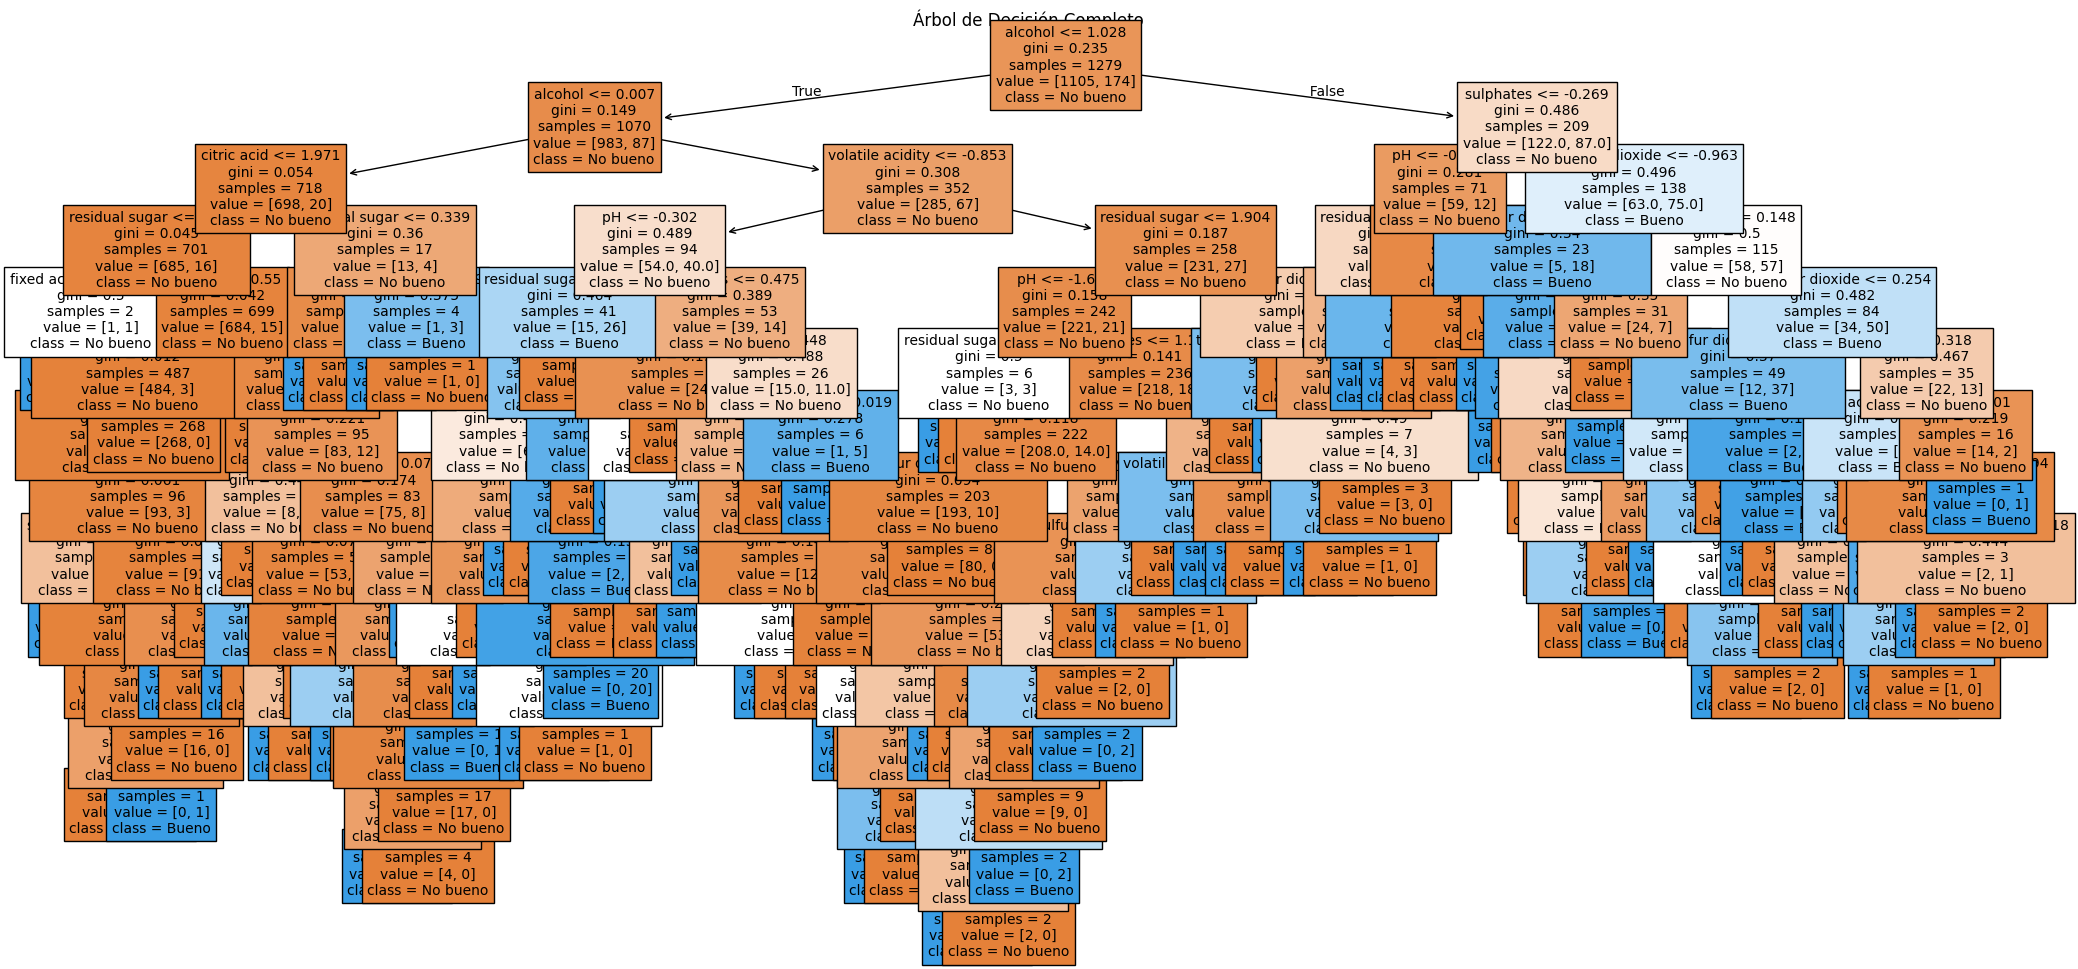

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))
plot_tree(
    modelo_arbol,
    feature_names=X.columns,
    class_names=["No bueno", "Bueno"],
    filled=True,
    fontsize=10
)
plt.title("Árbol de Decisión Completo")
plt.show()


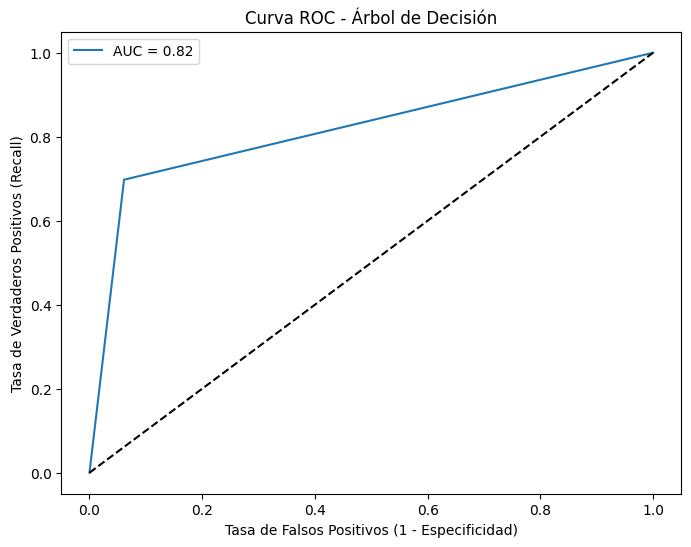

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades para clase positiva (vino bueno)
y_prob = modelo_arbol.predict_proba(X_test)[:, 1]

# Calcular ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Graficar ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)")
plt.ylabel("Tasa de Verdaderos Positivos (Recall)")
plt.title("Curva ROC - Árbol de Decisión")
plt.legend()
plt.show()


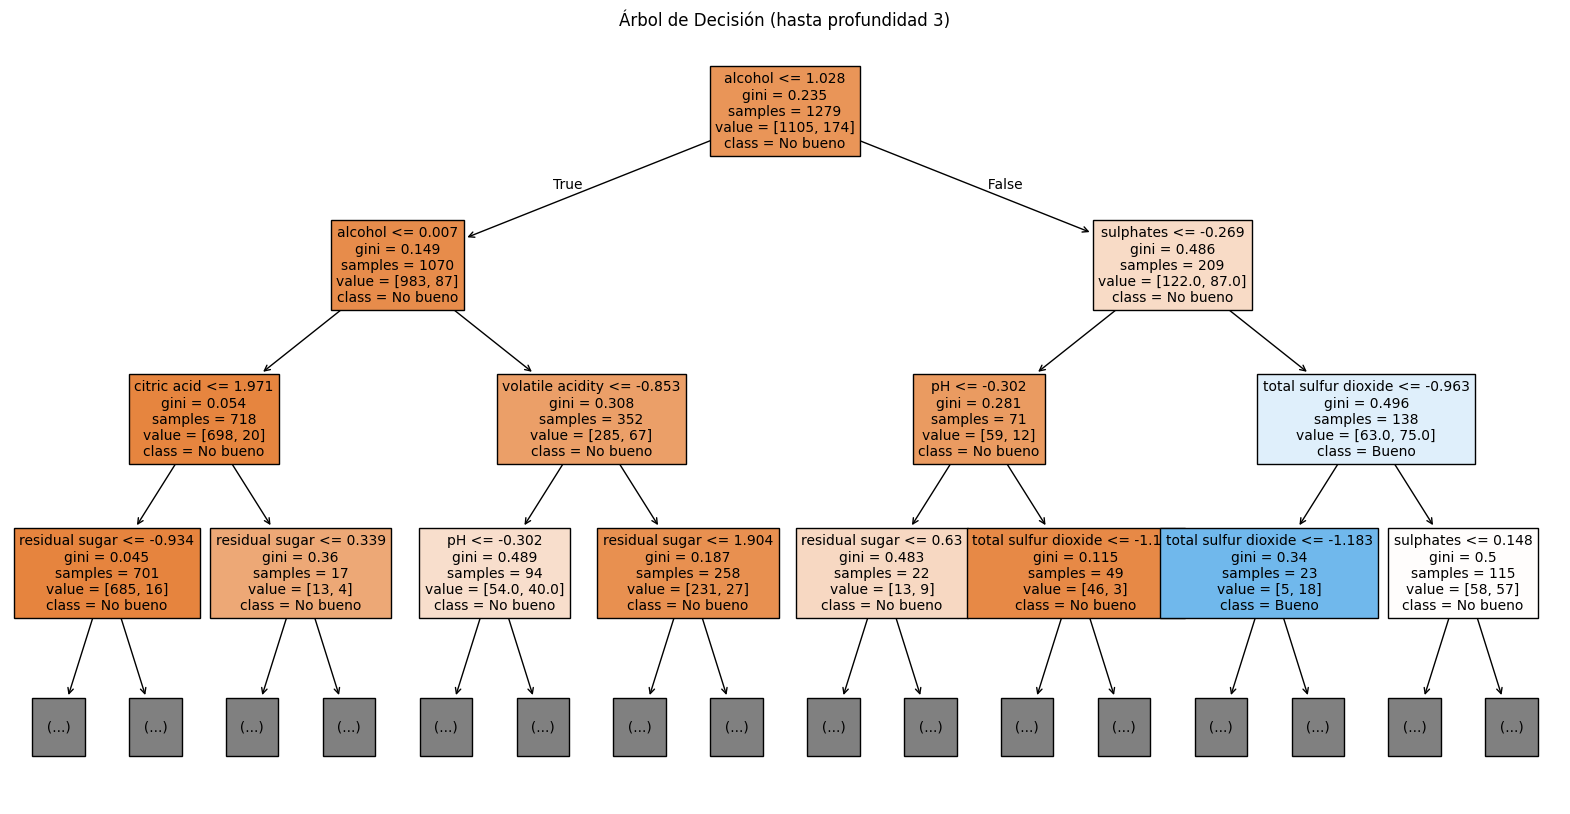

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    modelo_arbol,
    feature_names=X.columns,
    class_names=["No bueno", "Bueno"],
    filled=True,
    max_depth=3,  # Limita la profundidad
    fontsize=10
)
plt.title("Árbol de Decisión (hasta profundidad 3)")
plt.show()


In [11]:
### Interpretación del Modelo de Árbol de Decisión - Clasificación Binaria del Vino

###Se entrenó un modelo de Árbol de Decisión sobre el conjunto de datos `winequality-red.csv` para clasificar vinos como buenos (`quality` ≥ 7) o no buenos (`quality` < 7).

#### Resultados:

###- Accuracy: 90.62%
###- Precision: 63.83%
###- Recall: 69.77%
###- F1-Score: 66.67%

###El modelo mostró un rendimiento alto en general, pero un desempeño más modesto al identificar correctamente los vinos de alta calidad (clase 1). Esto se debe principalmente al desbalance de clases (muchos más vinos de calidad media/baja).

#### Matriz de Confusión:

###|                 | Predicho No Bueno | Predicho Bueno |
###|-----------------|-------------------|----------------|
###| Real No Bueno | 260               | 17             |
###| Real Bueno    | 13                | 30             |

#### Visualización:

###- Se generó un gráfico del árbol con profundidad limitada a 3 niveles para mejorar la comprensión del flujo de decisiones del modelo.
###- También se graficó la Curva ROC, obteniendo un AUC alto, lo cual sugiere que el modelo discrimina bien entre las clases.

#### Conclusión:

###El Árbol de Decisión es un modelo interpretable, rápido y eficaz para este tipo de tareas. Aunque su rendimiento en la clase minoritaria puede mejorarse, representa una solución sólida para una primera aproximación. Se podrían aplicar técnicas como balanceo de clases o usar modelos como Random Forest para mejorar la generalización.
